In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

data = pd.read_csv('/Users/varun/Desktop/MAchine learning/Assignments/Assignment_4/Categorical.csv')
colnames = list(data.columns[1:-1])
data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


In [33]:
r = data.iloc[:, 3].map({'North America':0,'Europe':1,'Asia':2,'Africa':3,'South America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'Antarctica':7})
data.drop('continent', inplace=True,axis=1)
data['continent']= r
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,2
238,South Africa,25.083901,-29.000341,3
239,Zambia,27.774759,-13.458242,3


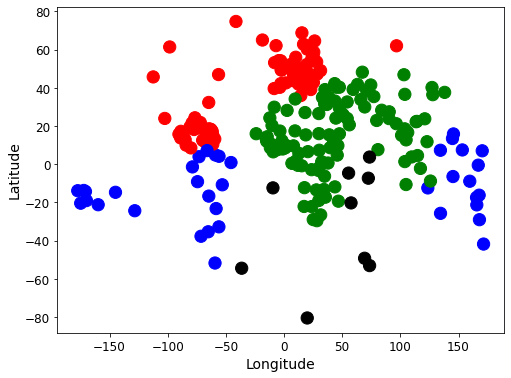

In [34]:
customcmap = ListedColormap(["red","Green","blue","black"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=data['Longitude'], y=data['Latitude'], s=150,
            c=data['continent'].astype('category'), 
            cmap = customcmap)
ax.set_xlabel(r'Longitude', fontsize=14)
ax.set_ylabel(r'Latitude', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [43]:
def setup_centroids(k, dset):
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=4
df = data[['Longitude','Latitude']]
centroids = setup_centroids(k, df)
centroids

,Longitude,Latitude
24,50.541969,26.042051
6,1.560544,42.542291
222,34.813100,-6.275654
208,55.476033,-4.660991


In [44]:
def sqrterr(a,b):
    return np.square(np.sum((a-b)**2)) 

In [48]:
for i, c in enumerate(range(centroids.shape[0])):
    err = sqrterr(centroids.iloc[c,:], df.iloc[208,:])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

Error for centroid 0: 935131.14
Error for centroid 1: 26368530.87
Error for centroid 2: 184525.18
Error for centroid 3: 0.00


In [49]:
def centroid_assignation(dset, centroids):
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        all_errors = np.array([])
        for c in range(k):
            err = sqrterr(centroids.iloc[c, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

       
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

In [51]:
df['c'], df['error'] = centroid_assignation(df, centroids)
df.head()

,Longitude,Latitude,c,error
0,-69.982677,12.520880,1,3.623700e+07
1,66.004734,33.835231,0,8.989846e+04
2,17.537368,-12.293361,2,1.119998e+05
3,-63.064989,18.223959,1,2.273231e+07
4,20.049834,41.142450,1,1.182077e+05


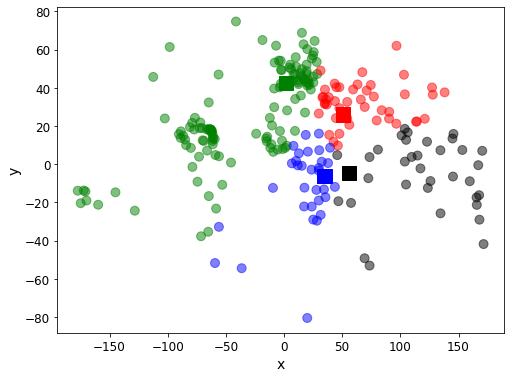

In [52]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['c'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2, 3], 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [53]:
print("The total error is {0:.2f}".format(df['error'].sum()))

The total error is 12557055103.39


In [54]:
centroids = df.groupby('c').agg('mean').loc[:, colnames].reset_index(drop = True)
centroids

,Longitude,Latitude
0,65.778195,31.881001
1,-34.422421,25.672423
2,17.129167,-11.857414
3,117.322684,-5.829083


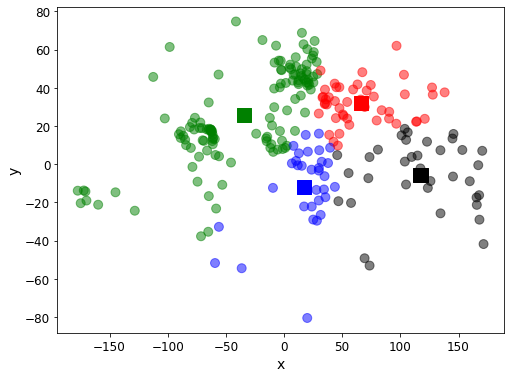

In [55]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['c'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200,
            c=[0, 1, 2, 3], cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()